<a href="https://colab.research.google.com/github/maxvell07/TelecomLabs/blob/main/Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Проведём импорт необходимых библиотек и файлов:

In [14]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

# **Упражнение 8.1**

Блокнот для этой главыы - `chap08.ipynb`. Прочитайте его и запустите код.

В нём есть интерактивный виджет, где можно экспериментировать с параметрами гауссова окна и изучить их влияние на частоту среза.

Что слуится, если при увеличении ширины гауссова окна `std` не увеличивать число элементов в окне `M`?

<ipython-input-2-39477c0917e0>:3: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian = scipy.signal.gaussian(M=32, std=2)


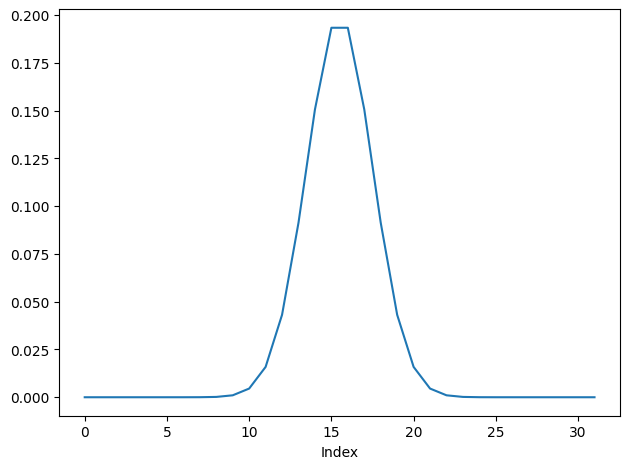

In [2]:
import scipy.signal

gaussian = scipy.signal.gaussian(M=32, std=2)
gaussian /= sum(gaussian)
plt.plot(gaussian)
decorate(xlabel='Index')

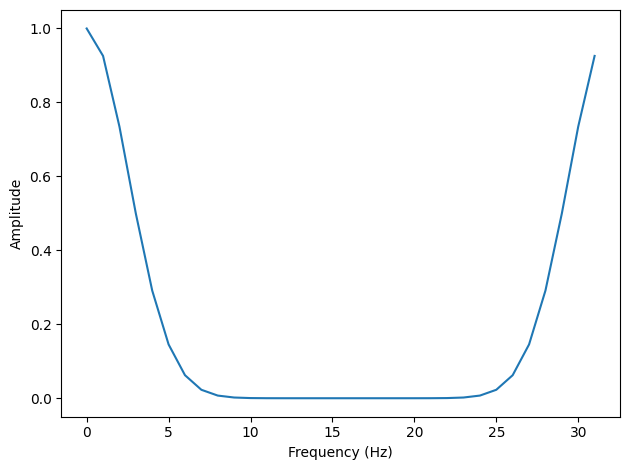

In [3]:
fft_gaussian = np.fft.fft(gaussian)
plt.plot(abs(fft_gaussian))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

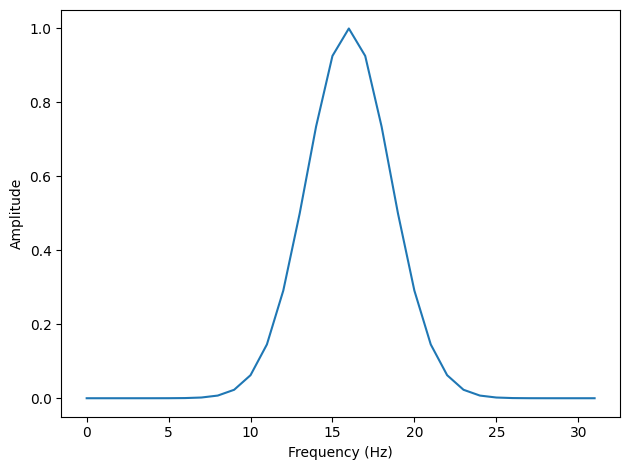

In [4]:
N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
plt.plot(abs(fft_rolled))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

<ipython-input-5-a8f30dde1646>:3: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian = scipy.signal.gaussian(M=M, std=std)


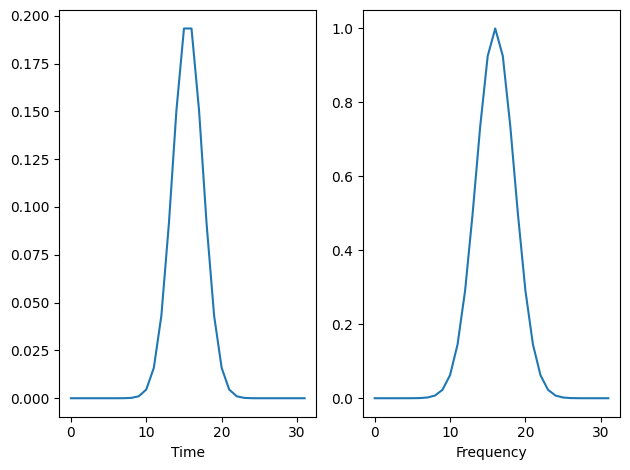

In [5]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)

    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Time')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)

    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Frequency')
    plt.show()

plot_gaussian(2)

In [6]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider);

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

Видно, что по мере увеличения std и постоянном числе элементов М гауссово преобразование становится шире.

# **Упражнение 8.2**

В этой главе утверждается, что преобразование Фурье гауссовой кривой - также гауссова кривая. Для дискретного преобразования Фурье это приблизительно верно.

Попробуйте его на нескольких примерах. Что происходит с преобразованием Фурье, если меняется `std`?

Из предыдущего упражнения видно, что при увеличении `std` БПФ становится уже, то есть реакция обратная от гауссова преобразования.

# **Упражнение 8.3**

В упражнениях к главе 3 изучалось влияение на утечки спектра окна Хэмминга и некоторых других, предоставляемых NumPy. Глубже понять эти окна можно, изучив их ДПФ.

В дополнение к Гауссову окну, использованному в этой главе, создайте окно Хэмминга тех же размеров. Дополните окно нулями и напечатайте его ДПФ. Какое окно больше подходит для фильтра НЧ? Полезно напечатать ДПФ с логарифмическим масштабом по *y*.

Поэкспериментируйте с разными окнами и разными размерами этих окон.

Просто выполним задание по пунктам.

Создадим 1-секундную волну с дискретизацией на частоте 44,1 кГц.

In [7]:
from thinkdsp import SquareSignal

signal = SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)

In [8]:
M = 15
std = 2.5

gaussian = scipy.signal.gaussian(M=M, std=std)
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [blackman, gaussian, hanning, hamming]
names = ['blackman', 'gaussian', 'hanning', 'hamming']

for window in windows:
    window /= sum(window)

<ipython-input-8-aaaf047e132d>:4: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  gaussian = scipy.signal.gaussian(M=M, std=std)


Создадим несколько окон, посмотрим на их размеры.

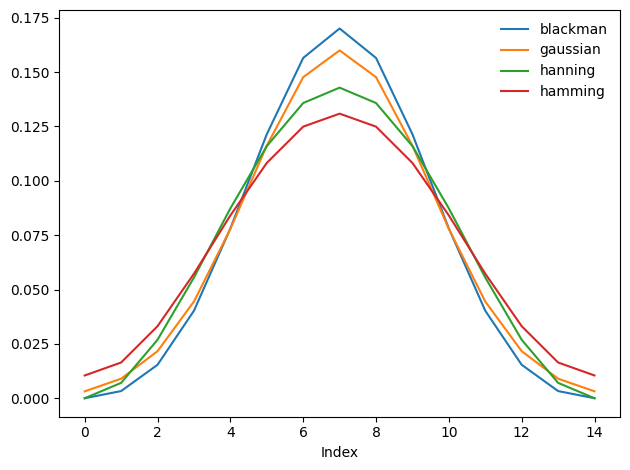

In [9]:
for window, name in zip(windows, names):
    plt.plot(window, label=name)

decorate(xlabel='Index')

Дополним окно нулями и напечатаем ДПФ:

In [10]:
def zero_pad(array, n):
    res = np.zeros(n)
    res[:len(array)] = array
    return res

In [11]:
def plot_window_dfts(windows, names):
    for window, name in zip(windows, names):
        padded =  zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)

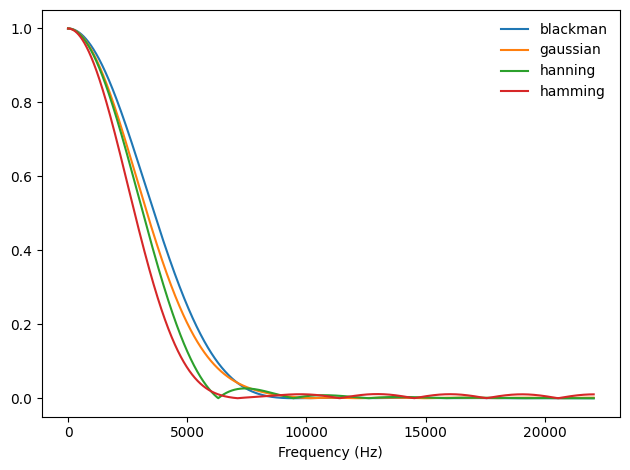

In [12]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)')

Окна похожи, но окно Хэмминга спадает быстрее остальных, окно Блэкмана медленнее всех, а у окна Ханнинга самые заметные боковые лепестки.

Посмотрим на ДПФ с логарифмическим масштабом по *y*:

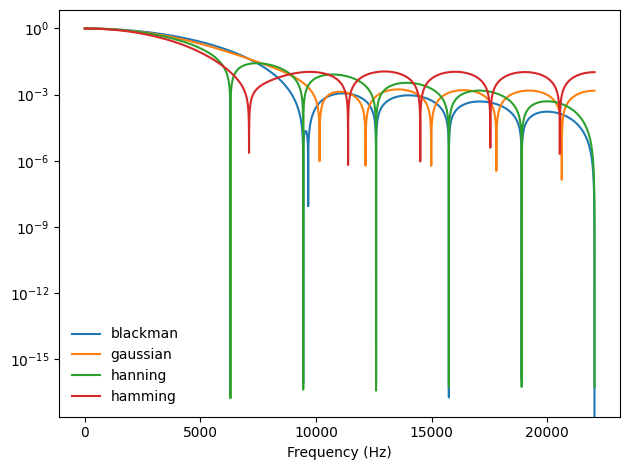

In [13]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)', yscale='log')

Можем увидеть, что окна Хэмминга и Ханнинга поначалу спадают быстрее остальных. А окна Хэмминга и Гаусса имеют самые стойкие боковые лепестки.

Окно Ханнинга имеет наилучшее сочетание быстрого снижения и минимальных боковых лепестков.